# Intro example (the [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set))

ver. 2021-03-22

The goal of this notebook is to introduce some of the basic ingredients and techniques in machine learning.

We'll use a much studied, classical data set: [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris)

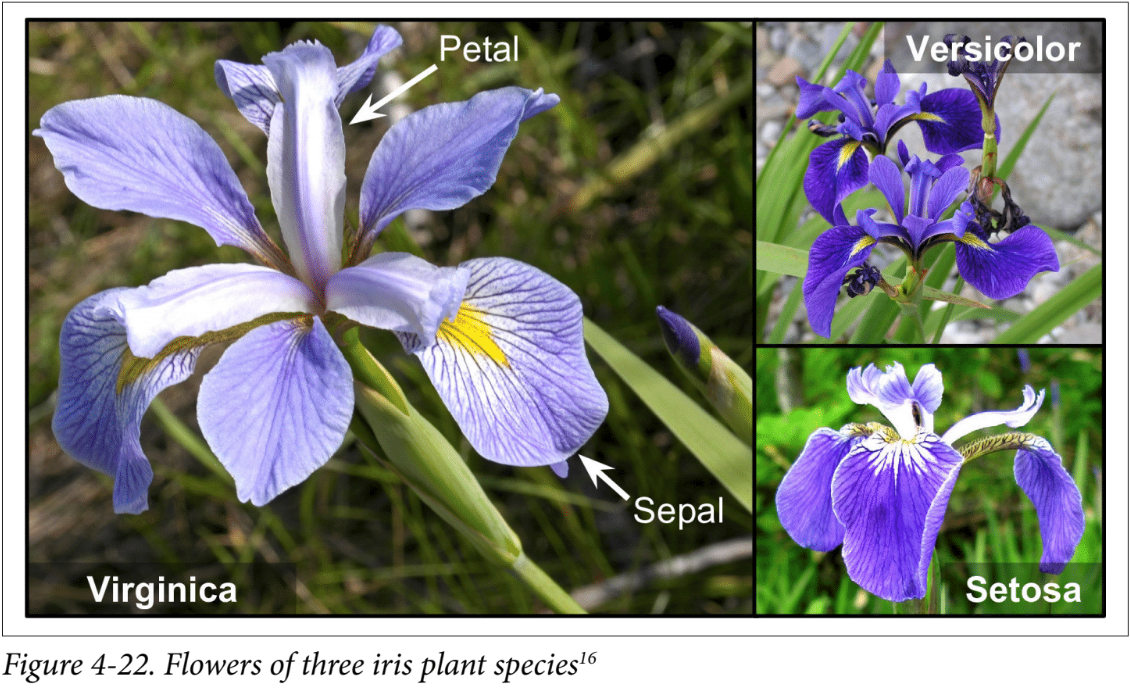

In [1]:
import IPython
IPython.display.Image("./assets/iris.png", width="60%")

The task is to predict the Iris species, denoted $y$ , i.e. Iris-Setosa, Iris-Versicolor or Iris-Virginica from measurements, denoted $X$.

# Setup

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Expressive plotting library

In [3]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

You should include the following in all your notebooks.

In [4]:
%matplotlib inline

> **Your turn:** Read about these and other magic commands by running %magic in a code cell. You can uncomment the command below and run the cell using Shift+Enter.

In [5]:
#%magic

We'll use scikit-learn for most of the hands-on parts of BMED360 (except when we get to deep learning):

In [6]:
import sklearn

# Prepare the data

In [7]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

List of available *features* in the data set:

In [8]:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


List of predefined *labels*:

In [9]:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


In [10]:
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)

iris_df['label'] = iris_dataset['target']

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Show the Iris data description

In [12]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Ex. What's the sample size of the iris dataset? 

In [14]:
# %load solutions/ex1_0.py
iris_df.shape[0]

150

## Look at the feature distribution among the iris species

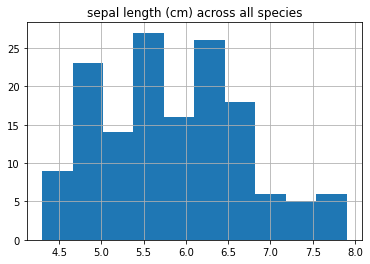

In [15]:
# The distribution of a specified feature for all the plants
feat = 'sepal length (cm)'
iris_df[feat].hist()
plt.title(feat+' across all species')
plt.show()

**Scatter plots** can tell us how the various features differ among the different plants:

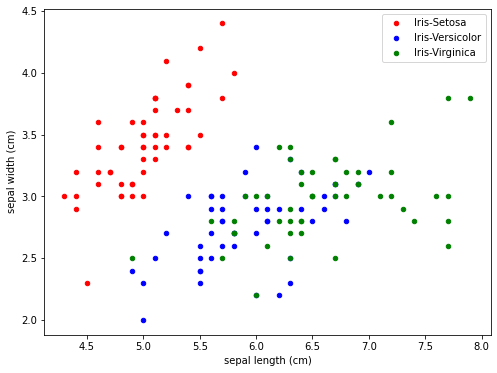

In [16]:
# Scatter plot for sepal length versus sepal width, colored by the plant class:

ax = iris_df[iris_df['label'] == 0].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='red', label='Iris-Setosa', figsize=(8,6))

iris_df[iris_df['label'] == 1].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='blue', label='Iris-Versicolor', ax=ax)

iris_df[iris_df['label'] == 2].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='green', label='Iris-Virginica', ax=ax)

plt.show()

Pandas can actually create these plots for us for each pair of features in the data frame. We color the dots by their label using c = iris_df['label']. (https://www.marsja.se/pandas-scatter-matrix-pair-plot)

**Labels** (numeric and textual)

In [17]:
iris_df.label.unique()

array([0, 1, 2])

0 means Setosa, 1 is Versicolor and 2 is Virginica (remember that Python lists are indexed starting from 0):

In [18]:
class_names = list(iris_dataset['target_names'])
class_names

['setosa', 'versicolor', 'virginica']

Or, combined:

In [20]:
y = iris_dataset['target']
labs = list(zip(range(len(y)), iris_dataset['target_names']))
labs

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

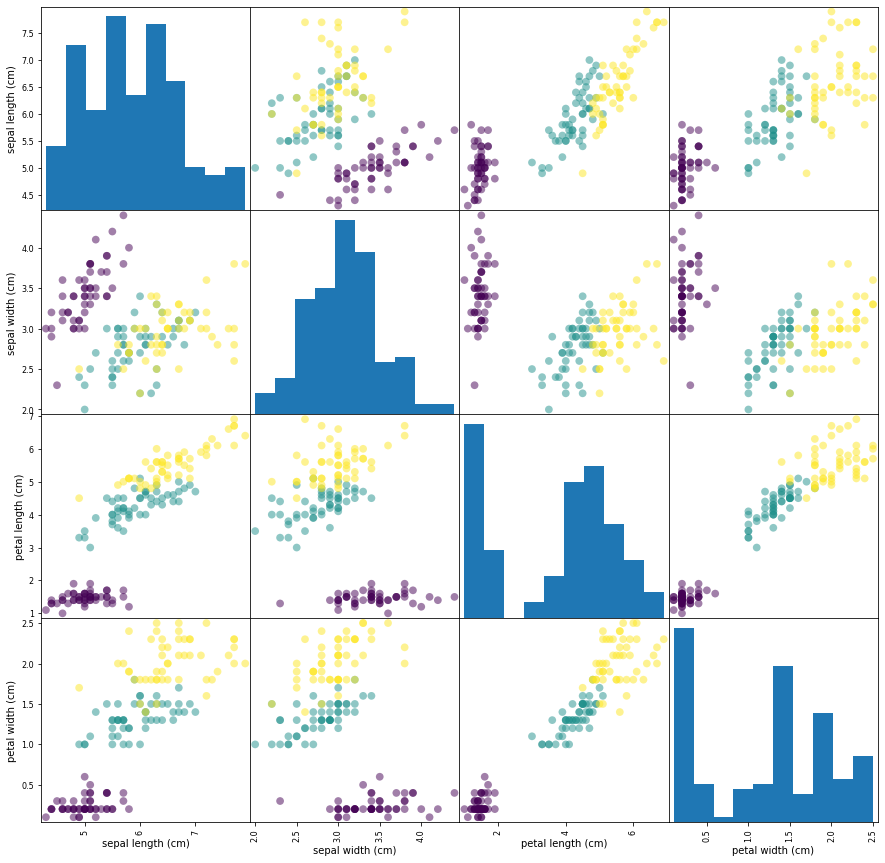

In [21]:
scm = pd.plotting.scatter_matrix(iris_df[features], 
                           diagonal='hist',
                           c=iris_df['label'], 
                           figsize=(15,15), 
                           marker='o', 
                           s=60)
plt.show()

We observe that the colors are highly separated. **To successfully train a machine learning model to distinguish the classes therefore seems promising!**

> Visualization of data forms a crucial part of applied machine learning. Carefully designed plots can reveal patterns in the data, patterns we can exploit when constructing predictive machine learning models.

> **Your turn!** To get a feeling for the many different ways you can visualize data, have a quick look at the example gallery of the Python library seaborn: https://seaborn.pydata.org/examples/index.html. Feel free to play around with the examples. Here's a guide to the plotting features of Pandas, also worth a look: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. You'll make use of these throughout the course.

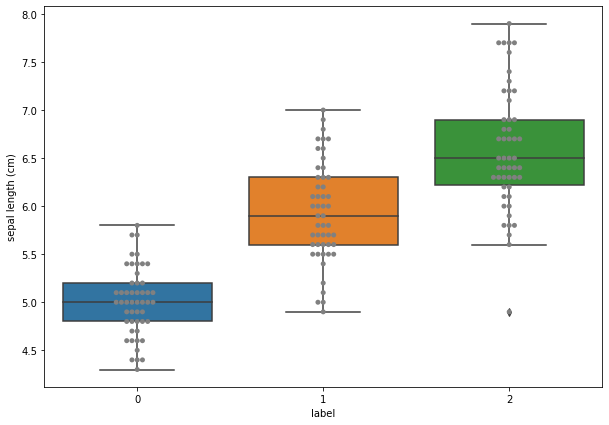

In [22]:
plt.figure(figsize = (10,7))

# Usual boxplot
ax = sns.boxplot(x='label', y='sepal length (cm)', data=iris_df)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='label', y='sepal length (cm)', data=iris_df, color="gray")

# Classification

We have access to two different measurements (sepal length and with) for 150 samples. From these feature denoted as (and stored in)  $X$  the task is to predict the correct label, denoted  $y$, i.e.

$$y \approx f(X;\theta)$$

where  $f$  is the model (e.g. [RandomForest](https://en.wikipedia.org/wiki/Random_forest)) and  $\theta$  are the model parameters to be learnt from data.

# Split the data in a training set and a test set

In [23]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
train_test_split??

Object `train_test_split` not found.


In the Sklearn implementation, we first separate the X (features) from y (target), then feed those two into the function.
#### Ex1_1. assign the relevant values to X and y (but only the two first features of X).

In [25]:
# %load solutions/ex1_1.py
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

In [26]:
print(X.shape, y.shape)

(150, 2) (150,)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for d in X_train, X_test, y_train, y_test:
    print (d.shape)

(112, 2)
(38, 2)
(112,)
(38,)


### Usually before you do any machine learning, you inspect the data, preferably visually. 

In this example we are using only 2 features. Our data contains 4 features in total, so plotting is not without tradeoff, but it demonstrates something important. 

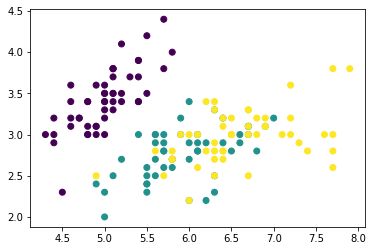

In [28]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Now the task becomes trivial: all we have to do is to draw a line to separate the dots of different color (i.e. species). This can be done easily for the purple class, while the others are largely overlapping. Don't forget though that there are a total of 4 features, so perhaps they all are separable using all the features (but we can't visually see it). This abstract space of features in which the samples resides are referred to as **feature space**.

**Idea**: just classify a sample based on whoever is its closest neighbors. This is known as K-nearest neighbors (KNN), the simplest supervised ML algorithm.

### A quick note on ML in practice.
The largest general-purpose ML library in Python is scikit-learn (sklearn). Working with a ML model is divided into 3 steps: 
- choose a model and instantiate it.
- train the model using the `fit` method.
- evaluate the model by predicting left out test data, and comparing your prediction to the ground truth.

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [30]:
model = KNN(n_neighbors=5) # define the model and specify hyperparameters
model.fit(X_train, y_train) # train the model
preds = model.predict(X_test) # predict on the unseen data

#### Ex1.2. Provide the accuracy of your model (percentage of correct predictions) on the test data.

In [31]:
# %load solutions/ex1_2.py
np.mean((preds == y_test).astype(int))

0.8157894736842105

Most ML models of Sklearn happen to have a `score` method, which will do the evaluation for you. The default metric is **accuracy**.

In [32]:
test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
print(f"test score: {test_score} \ntrain score: {train_score}")

test score: 0.8157894736842105 
train score: 0.8214285714285714


## Feature scaling

So far we have done minimal preprocessing. With few exceptions, you should always do some basic preprocessing, like standardizing each input feature to zero mean and unit variance. In fact, you should never do KNN without standardizing the input first. `Sklearn` has a great functionality, and offers a vast number of options for preproccesing in the `preprocessing` sub module.

#### Why scale the features?
Especially in algorithms like KNN, it is the distance between data points that determine the prediction. If the unit of one feature is on the range (0-1000), that feature would totally dominate the total distance between two points. Empirically, feature scaling also enhances performance, and sometimes speed.

In [33]:
from sklearn.preprocessing import StandardScaler # this will centre the data and give it unit variance.

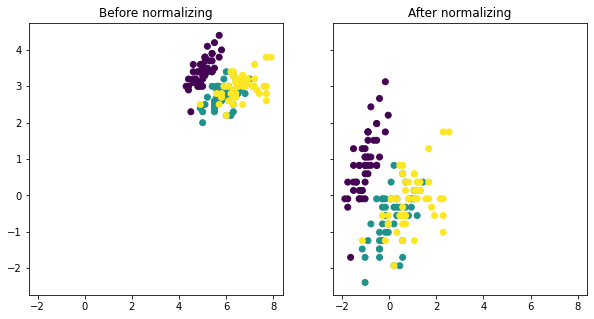

In [34]:
scaler = StandardScaler() # instantiate the scaler
scaler.fit(X_train) # fit only the training set
X_scaled = scaler.transform(X) # puts the values of X onto another interval

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True) # make two plots on the same row
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_title('Before normalizing') # set the title of the first subplot
ax[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y) 
ax[1].set_title('After normalizing') # set the title of the second subplot
plt.show()

In [35]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y):
    """
    X : input data
    y : input labels
    clf : the sklearn classifier
    
    """
    h = .05 
    # Define some custom colors
    cmap_light = ListedColormap(['orange', 'pink', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'red', 'darkblue'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

<ipython-input-35-0b1908543e4b>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


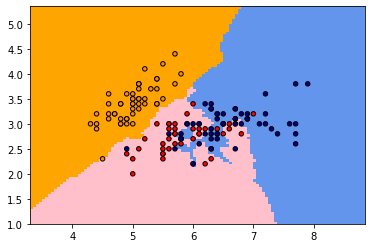

In [36]:
plot_decision_boundary(model, X, y)

#### Ex1.3. Vary the number of neighbors in your model, retrain, and plot with title `k`. (e.g. write a loop)

<ipython-input-35-0b1908543e4b>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-35-0b1908543e4b>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-35-0b1908543e4b>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y,

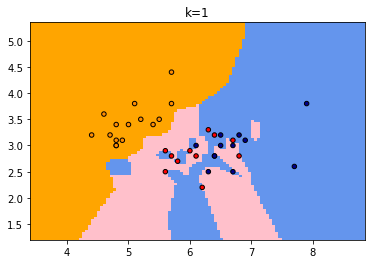

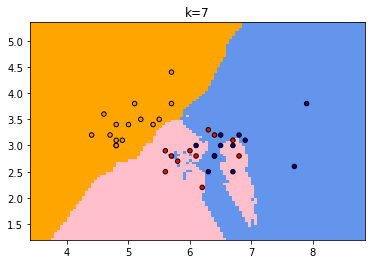

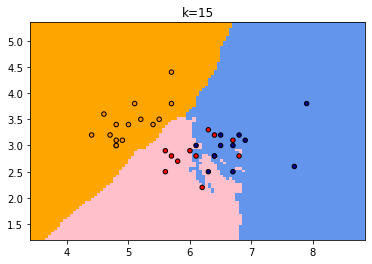

In [37]:
# %load solutions/ex1_3.py
for k in [1, 7, 15]:
    clf = KNN(n_neighbors = k)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X_test, y_test)
    plt.title(f'k={k}')
plt.show()

#The decision boundary is more fine-grained for small Ks.

# Select a model

## Here a random forest classifier
Explained [[here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)] and [[here](https://machinelearningmastery.com/random-forest-ensemble-in-python)] and [[here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)]

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

As you see, there are a bunch of parameters to choose in a RandomForestClassifier:

In [40]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Train the model
Notably, decision tree based methods are not affected by feature scaling (they are unique in this regard).

In [41]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = rf.predict(X_test)

# Explore the results on the (previously unseen) test dataset

## Accuracy, precision and recall 
Explained [[here](https://en.wikipedia.org/wiki/Precision_and_recall)]

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy:', accuracy_score(y_test, y_pred).round(3))
print('precision:', precision_score(y_test, y_pred, average='macro').round(3))
print('recall:', recall_score(y_test, y_pred, average='macro').round(3))

accuracy: 0.789
precision: 0.768
recall: 0.768


## Confusion matrix
Explained [[here](https://en.wikipedia.org/wiki/Confusion_matrix)]

In [44]:
from utils import plot_confusion_matrix, plot_confusion_matrix_with_colorbar

In [45]:
class_names = iris_dataset['target_names']

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[15  0  0]
 [ 0  7  4]
 [ 0  4  8]]


Using the plot confusion function in `utils.py`

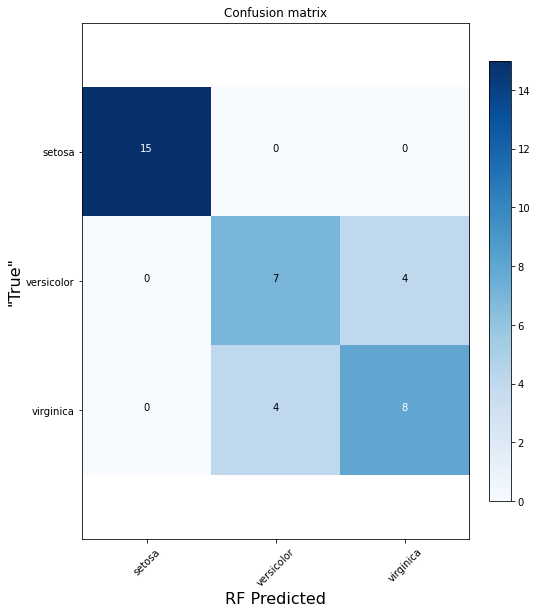

In [47]:
plot_confusion_matrix_with_colorbar(cm, classes=class_names, title='Confusion matrix', figsize=(8,8))
plt.ylabel('"True"')
plt.xlabel('RF Predicted')
plt.show()

Or, using Seaborn's `heatmap`:

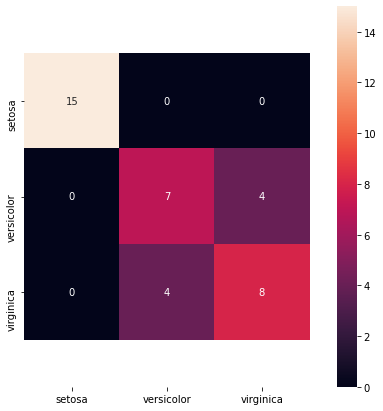

In [48]:
df_cm = pd.DataFrame(cm, index = [i for i in class_names],
                  columns = [i for i in class_names])

plt.figure(figsize = (10,7))
ax=sns.heatmap(df_cm, annot=True, fmt='d', square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Another example

## Load, explore and prepare the data

Let's repeat the procedure on another benchmark data set: **Diabetes Data Set**. You'll find a description of the data set together with a link to the data here:  https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

We download the data using `urllib`, and store the file in the directory `./data`

In [49]:
import urllib.request

In [50]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

In [51]:
# Create directory to store data
import os
if not os.path.exists('data'):
    os.makedirs('data')

In [52]:
urllib.request.urlretrieve(url, 'data/diabetes.csv')

('data/diabetes.csv', <http.client.HTTPMessage at 0x7fdb21cfd190>)

As usual, we use Pandas to inspect and process text data:

In [53]:
diabetes = pd.read_csv('data/diabetes.csv')

In [54]:
diabetes

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
len(diabetes)

768

We notice that there are eight feature columns and one target column (diabetes).

More information about the data can be found using `describe` and `info`:

In [56]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It's all numbers, and all the samples contain values for all the features (there are 768 non-NaN values). 

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

As before we can visualize the connection between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

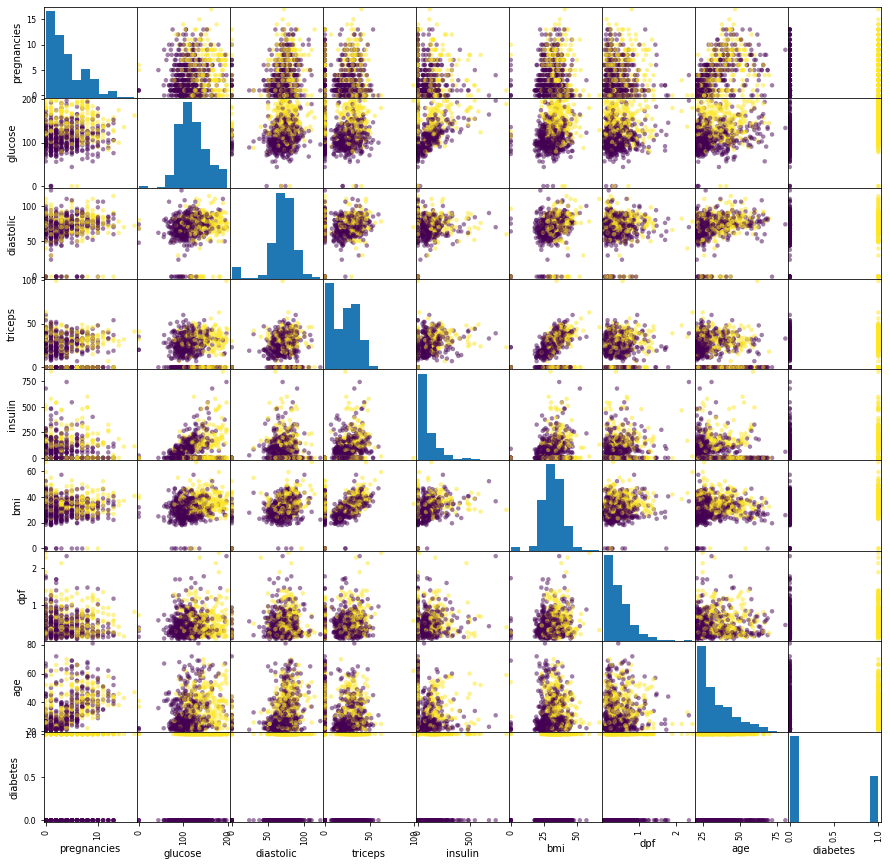

In [58]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=20)
plt.show()

We observe that this seems like a tougher problem than Iris. Still, let's follow the same procedure:

### Select which features to use

... this time we'll use all the features to construct our model. We let $X$ consist of all columns except the target $y$ `diabetes`:

In [59]:
X = diabetes[diabetes.columns[0:-1]]       

In [60]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


The target variable is in the `diabetes` column. `1` means diabetes, `0` not diabetes.

In [61]:
y = diabetes['diabetes']

In [62]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

**Ex 1.4. Get dataframe containing number of subjects with non-diabetes (label=0) and with diabetes (label=1)** <br>
Hint: Return a Series containing counts of unique values.

In [63]:
# %load solutions/ex1_4.py
labels = pd.Index(y)
df = pd.DataFrame(labels.value_counts())
df.columns = ['Number']
df = df.rename_axis(index='Diabetes')
df

,Number
Diabetes,
0,500
1,268


### Training and test data

We split into training and test sets:

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine learning model

... and train a random forest model:

In [65]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) 
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Evaluate the model

Now we can make predictions on the test set and compute the accuracy:

In [67]:
y_pred = rf.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.734375

With this model we can predict diabetes from the given features with an accuracy of 73%.

# Machine learning models are highly generic!

> **Important!** Notice that the way we studied the diabetes data was essentially identical to what we did for Iris! 

This was our Iris code:

In [69]:
# Load the data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

Here's the code for diabetes:

In [70]:
# Load the data
diabetes = pd.read_csv('data/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.734375

**The only difference is that we changed the data!** 

> **Machine learning models are generic: the same model can be used for many different tasks!**

# Further study of diabetes: understanding the model's predictions

An important part of constructing good machine learning models is inspecting what the model has learned. How it weighs the various features when making its decisions in specific cases, how it would react if the features were different in some interesting ways, and so on. This is useful both for improving the models and the input data, and, sometimes, to get a better understanding of the problem the model tries to solve (here's a very interesting example of this [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), from [here](https://www.nature.com/articles/s41746-018-0029-1). This has been discussed in our ELMED219 course [here](https://github.com/MMIV-ML/ELMED219-2021/tree/main/Lab1-HealthRecords).

For example, what features are the most, and least, important for our diabetes classifier? What's the relation between BMI and diabetes according to our model? 

## Feature importance

When using random forests it's possible to compute how much each feature influenced the predictions. The so-called **feature importance**. We'll learn more about this later. 

In [71]:
importances = rf.feature_importances_

In [72]:
importances

array([0.07449143, 0.27876091, 0.08888318, 0.07157507, 0.07091345,
       0.15805822, 0.11822478, 0.13909297])

In [73]:
# Find index of those with highest importance, sorted from largest to smallest:
indices = np.argsort(importances)[::-1]

In [74]:
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


The glucose level has the largest explanatory value, followed by BMI. It's not hard to imagine that this kind of information is very useful in practice! However, it is something that **must be used carefully**, as the feature importances from a single model can be quite misleading. If you have a look at how random forests work, how they are constructed from quite brittle decision trees, you'll understand why this is the case.

## Permutation importance

Feature importances in the random forest classification models of scikit-learn is based on measuring how efficient each feature is in reducing uncertainty (the so-called *impurity* in random forests). Often this results in an incorrect estimate of how important each feature actually is (see https://explained.ai/rf-importance/index.html for a deep-dive into this). 

A more robust technique is what's called **permutation importance**. 

The idea is that if a feature is important for the predictions of a trained model then a random shuffling of the data in the corresponding column should drastically reduce the accuracy of the model. On the other hand, a random shuffling of an unimportant feature shouldn't impact the model much. 

The `eli5` library has an implementation of this idea, compatible with scikit-learn models:<br>
(_ELI5 is short for "Explain Like I'm 5," a request for a simple explanation to a complicated question or problem_)

In [75]:
import eli5
from eli5.sklearn import PermutationImportance

In [76]:
perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)

In [77]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1031 ± 0.0576,glucose
0.0187 ± 0.0083,bmi
0.0104 ± 0.0114,insulin
0.0083 ± 0.0169,dpf
-0.0073 ± 0.0156,triceps
-0.0115 ± 0.0202,pregnancies
-0.0146 ± 0.0305,diastolic
-0.0188 ± 0.0214,age


We observe that `glucose` is the most important feature by far. If you shuffle `glucose` the model accuracy decreases by more than 10 percentage points. The four features that had negative weights were useless for the predictions: in fact, if you shuffle these at random you will sometimes obtain slightly *better* accuracy!

## Partial dependence plots (PDP)

PDP is another useful way to understand and explain predictions made by machine learning algorithms.

When using black box machine learning algorithms like random forest and boosting, it is hard to understand the relations between predictors and model outcome. For example, in terms of random forest, all we get is the feature importance. Although we can know which feature is significantly influencing the outcome based on the importance calculation, it really sucks that we don’t know in which direction it is influencing. And in most of the real cases, the effect is _non-monotonic_. We need some powerful tools to help understanding the complex relations between predictors and model prediction.

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability for diabetes as the glucose level increases? As this is an important feature we expect it to change quite a bit (in fact, since we're talking about diabetes we expect the probability to increase). And what about unimportant features like age? 

We can use the `PDPbox` library, which is compatible with scikit-learn (see https://pdpbox.readthedocs.io/en/latest for details):

In [78]:
from pdpbox import pdp

In [79]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='glucose')

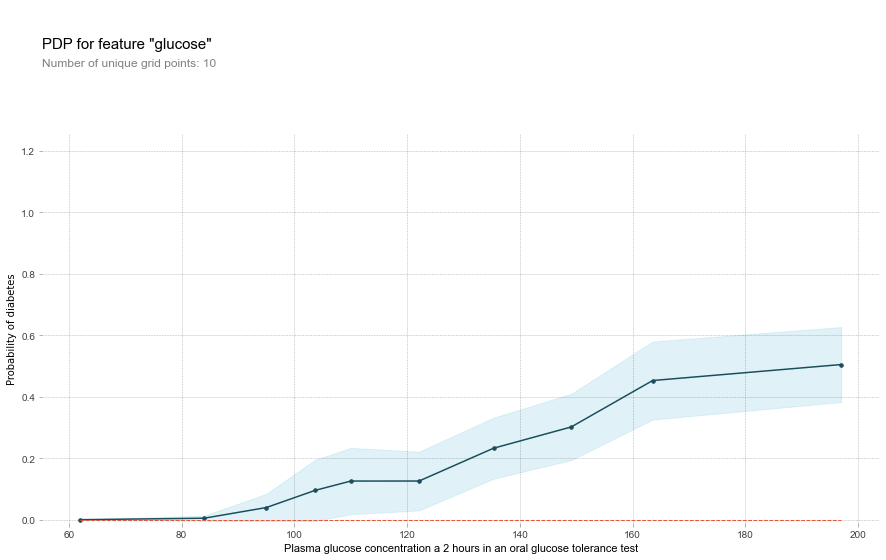

In [80]:
pdp.pdp_plot(pdp_goals, 'glucose')
plt.xlabel('Plasma glucose concentration a 2 hours in an oral glucose tolerance test')
plt.ylabel('Probability of diabetes')
plt.show()

We see that as the glucose level increases the predicted probability for diabetes increases. 

**What about BMI**?

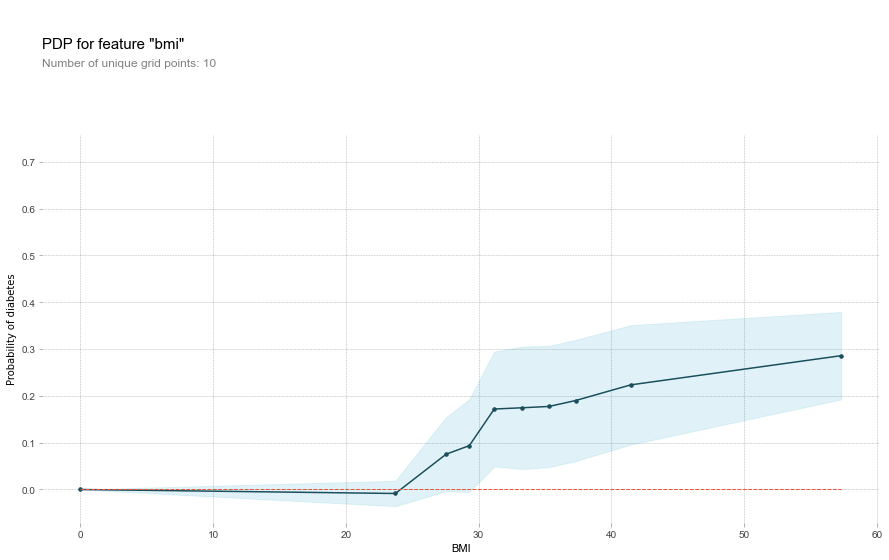

In [81]:
pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), feature='bmi')
pdp.pdp_plot(pdp_goals, 'bmi')
plt.xlabel('BMI')
plt.ylabel('Probability of diabetes')
plt.show()

Same for BMI. The plot for age demonstrates why this feature is deemed unimportant: the probability increases a bit at the beginning (low ages), but then it actually decreases. 

**... and age**?

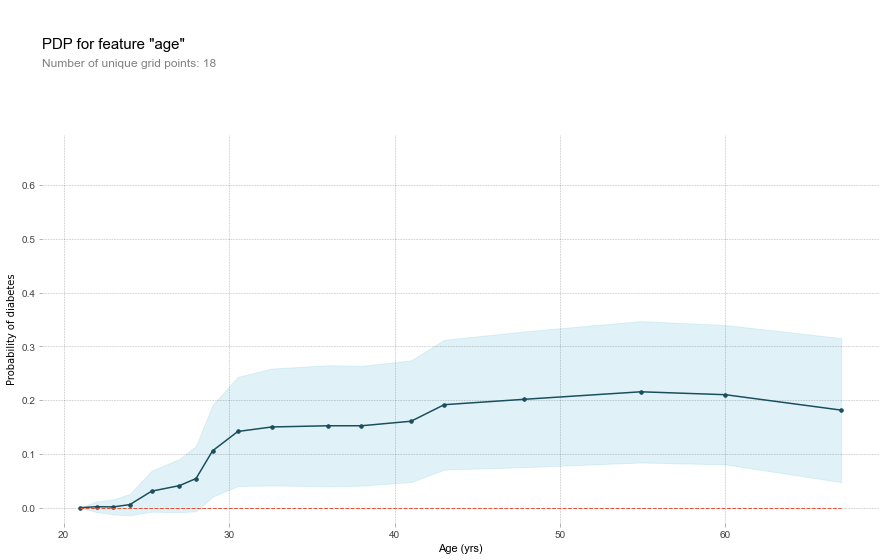

In [82]:
pdp_goals = pdp.pdp_isolate(model=rf, 
                            dataset=X_test, 
                            model_features=X_test.columns.tolist(),
                            num_grid_points=20,
                            feature='age')
pdp.pdp_plot(pdp_goals, 'age')
plt.xlabel('Age (yrs)')
plt.ylabel('Probability of diabetes')
plt.show()

### Two-dimensional PDP

Typically it's the interaction among several features that influences model predictions, not each feature independently. By plotting two-dimensional interaction plots one can get a better understanding of how the features influence the predictions:

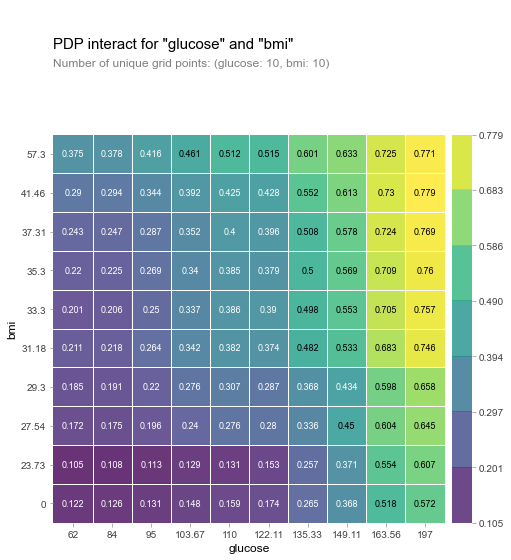

In [83]:
features = ['glucose', 'bmi']
interact  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features)

pdp.pdp_interact_plot(pdp_interact_out=interact, feature_names=features, plot_type='grid')
plt.show()

> **NOTE:** Of course, all these conclusions depend on the exact data set that we have used. To make any real inferences about diabets and its relation to glucose level, BMI, age etc one would need a carefully designed (and large) data set. 

# Exercises for further learning

> **Your turn!**
- Get the feature importances for the Iris predictions. Is it sepal length or width that provides the most information?
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature imporances?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time the goal is to predict the country of origin of a car given various features. 